In [3]:
import os

os.makedirs(os.path.join("data"), exist_ok=True)
data_file = os.path.join("data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [4]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [5]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs[["NumRooms"]].mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [6]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [7]:
data_processed = inputs.join(outputs)
print(data_processed)

data_file = os.path.join("data", "house_tiny_processed.csv")
data_processed.to_csv(path_or_buf=data_file, index=False)

   NumRooms  Alley_Pave  Alley_nan   Price
0       3.0           1          0  127500
1       2.0           0          1  106000
2       4.0           0          1  178100
3       3.0           0          1  140000


In [8]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## Exercise

1. Create a raw dataset with more rows and columns.

2. Delete the column with the most missing values.

3. Convert the preprocessed dataset to the tensor format.

In [35]:
#create a dataset
data_file = os.path.join("data", "biomarkers.csv")
with open (data_file, "w") as f:
    f.write("MarkersOne, MarkersTwo, MarkersThree\n")
    f.write("1, 2, 3\n")
    f.write("1, YB2, 3\n")
    f.write("1, NA, 3\n")

In [36]:
data = pd.read_csv(data_file)
print(data)

   MarkersOne  MarkersTwo   MarkersThree
0           1           2              3
1           1         YB2              3
2           1          NA              3


In [37]:
inputs, outputs = data.iloc[:, 0:1], data.iloc[:, 2:3]

In [38]:
data_processed = inputs.join(outputs)
data_processed

,MarkersOne,MarkersThree
0,1,3
1,1,3
2,1,3


In [39]:
print(inputs.values)

[[1]
 [1]
 [1]]


In [40]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[1],
         [1],
         [1]]),
 tensor([[3],
         [3],
         [3]]))

## MNIST

In [41]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [42]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/Users/maxhager/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-accccgfm/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


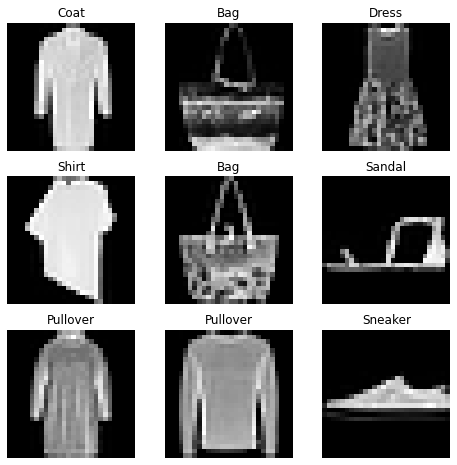

In [43]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()